# 8章金融時系列データ
## 西野泰平

### 8.1金融データ

##### 本節では csvファイル形式でローカルに格納された金融データセ ットを扱います。csvファイルの構造は、値をカンマで区切ったデータ行からなる単純なテキストファイルです。データインポートの前にパッケージのインポートとカスタマイズを行います。

In [1]:
import numpy as np 
import pandas as pd 
from pylab import mpl, plt 
plt.style.use('seaborn') 
mpl.rcParams['font.family'] ='serif' 
%matplotlib inline 

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_11768\3115206840.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### 8.1.1データのインポート

##### pandasには異なる形式 (CSV,SQL, Excelなど）で格納されたデータをインポートしたり、異なる形式でデータをエクスポートするさまざまな関数や DataFrameのメソッドがあります。次のコードは pd.read_csv(）関数を使いCSVファイルから時系列データセットをインポートします。

In [2]:
#パスとファイル名を指定
filename='C:\\Users\\iikkdn\\Desktop\\code\\python-for-finance\\tr_eikon_eod_data.csv'

In [3]:
#生データの先頭5行を表示
f = open(filename,'r')
f.readlines()[ :5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [4]:
#pd.read_csv()関数に渡すファイル名(1行目)
#第1列をインデックスに指定(2行目)
#DataFrameオブジェクトの概要(3行目)
data = pd.read_csv(filename, 
                     index_col=0, 
                     parse_dates=True)

In [5]:
#DataFrameオブジェクトの概要
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


##### この段階で金融アナリストなら検査または可視化して(図8-1を参照)、データをざっと眺めるでしょう。

In [6]:
#先頭5行を表示
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [7]:
#末尾5行を表示
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

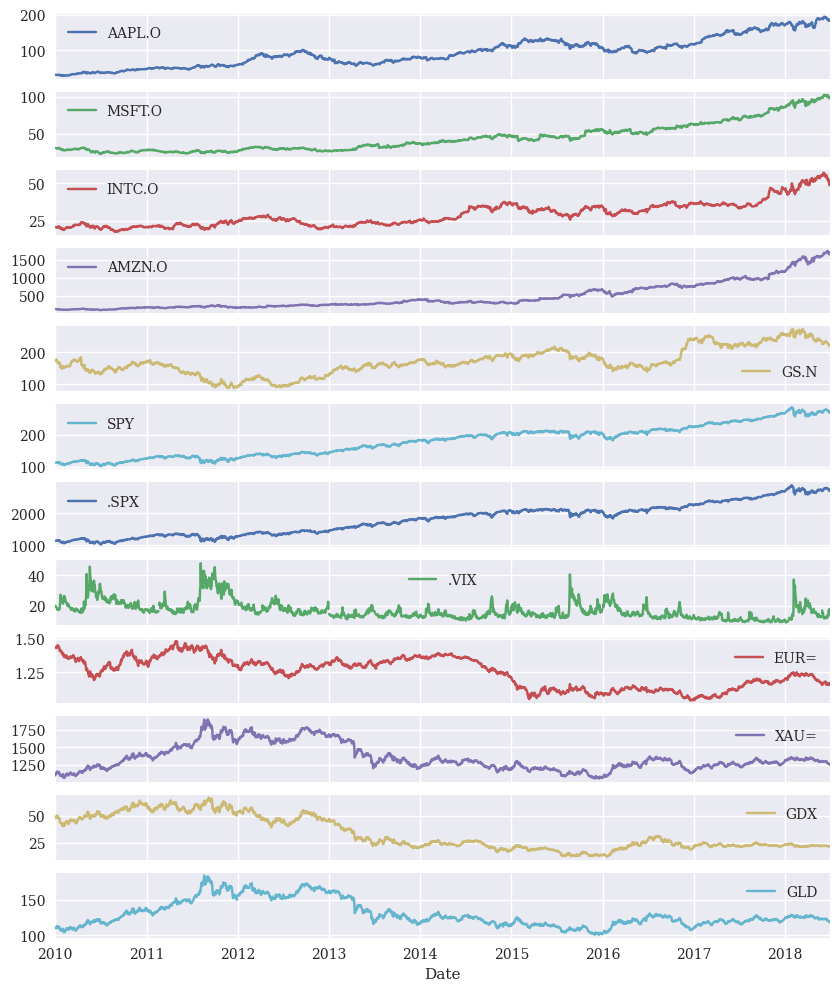

In [8]:
#複数のサブプロットによるすべてのデータを可視化
#図8-1　折れ線グラフによる金融時系列データ
data.plot(figsize=(10, 12), subplots=True)

##### Thomson Reuters (TR) EikonデータAPIで取得したデータを使います。TRで使われる金融商品のシンボルはロイター商品コード(RIC)と呼ばれます。金融商品のRICは次のようなものです。

In [9]:
instruments = ['Apple Stock','Microsoft Stock', 
'Intel Stock','Amazon Stock','Goldman Sachs Stock', 
'SPDR S&P 500 ETF Trust','S&P 500 Index', 
'VIX Volatility Index','EUR/USD Exchange Rate', 
'Gold Price','Van Eck Vectors Gold Miners ETF', 
'SPDR Gold Trust']

In [10]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'. format (ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | Van Eck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


#トムソン・ロイターのEikonについては以下のURLを参照

https://www.thomsonreuters.co.jp/ja/press-releases/2018/thomson-reuters-adds-msci-riskmetrics-to-eikon.html

#### 8.1.2要約統計量

##### 金融アナリストの次の作業は、データの様々な要約統計量を調べて、これは何かという｢感覚｣をつかむことが大切である。

In [11]:
#info()は、DataFrameオブジェクトのメタ情報を提供
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [12]:
#describe()は列ごとに役立つ標準統計量を示す
data.describe().round(2)


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


##### 表示する統計量の種類をカスタマイズできるオプションもあります。

In [13]:
#列ごとの平均値
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [14]:
#列ごとの最小値(2行目)
#列ごとの平均値(3行目)
#列ごとの標準偏差(4行目)
#列ごとの中央値(5行目)
#列ごとの最大値(6行目)
data.aggregate([min,
                np.mean, 
                np.std,
                np.median, 
                max] 
                ).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


##### aggregate()メソッドを使えば、カスタム関数を渡せます。

#### 8.1.3時間の経過に伴う変化

##### 多くの統計解析手法は絶対値ではなく時間の経過に伴う変化に基づいています。時系列の時間の経過に伴う変化の計算には差分、変化率、対数収益率など複数のオプションがあります。まず差分についてpandasには専用メソッドがあります。

In [16]:
#diff()で2つの行の差分を計算
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [17]:
#集約演算もできる
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

##### 統計の観点では、絶対変化は時系列データそのもののスケールに依存するので最適ではありません。したがって、価格変化率の方が好まれます。次のコードはファイナンスのために列ごとの価格変化率（単純リターン）を計算し、その平均値を可視化します(図8-2を参照)。

In [18]:
#pct_change()は2つのインデックス値の価格変化率を計算
data.pct_change().round(3).head() 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


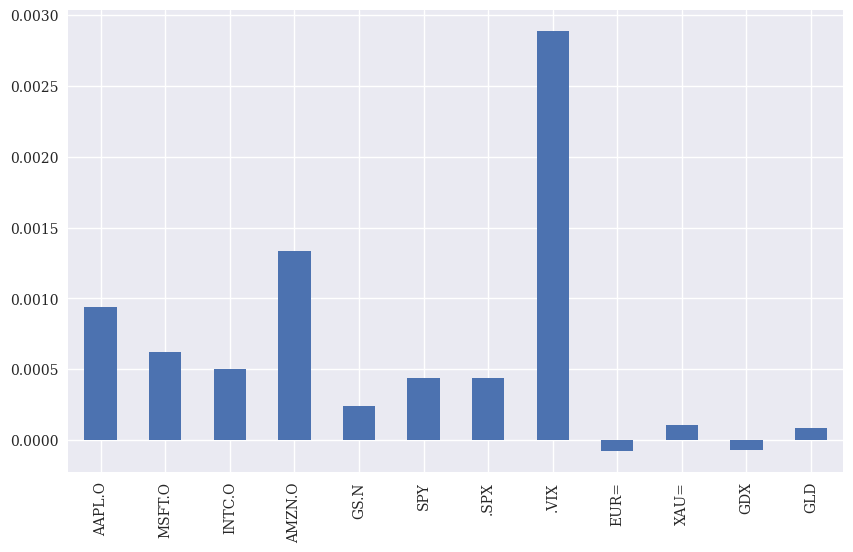

In [19]:
#結果の平均値を棒グラフで可視化
#図8-2 価格変化率の平均値の棒グラフ
data.pct_change().mean().plot(kind='bar', 
                              figsize=(10, 6));

In [20]:
#対数収益率のベクトル計算
rets = np.log(data / data.shift(1))

In [21]:
#結果のサブセット
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


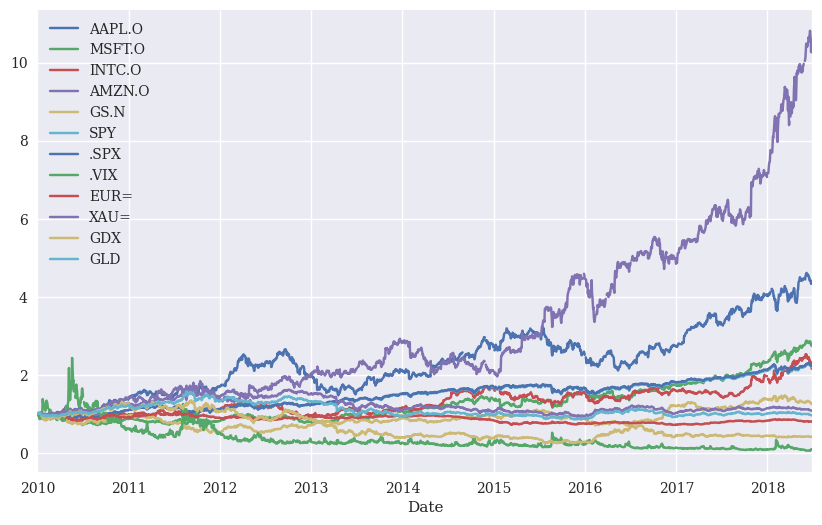

In [22]:
#累積対数収益率のプロット。まずcumsum()メソッド、次にnp.exp()で結果を得る。
#図8-3 累積対数収益率の時間の経過に伴う変化
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

#### 8.1.4リサンプリング

##### リサンプリングは金融時系列データで重要な操作です。通常、これはダウンサンプリングで、すなわち、例えばティックデータ時系列を1分間隔で、または日次時系列を週次、月次にリサンプリングするというように使います(図8-4)。

#ティックデータについては以下のURLを参照

https://www.jstage.jst.go.jp/article/fss/28/0/28_936/_pdf#:~:text=tick%20%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A8%E3%81%AF%E3%80%81%E8%A8%BC%E5%88%B8,%E3%81%AB%E7%94%A8%E3%81%84%20%E3%82%89%E3%82%8C%E3%81%A6%E3%81%84%E3%82%8B%E3%80%82

In [23]:
#EDDデータを週次にリサンプリング
data.resample ('1w',label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [24]:
#EODデータを月次にリサンプリング
data.resample('1m',label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


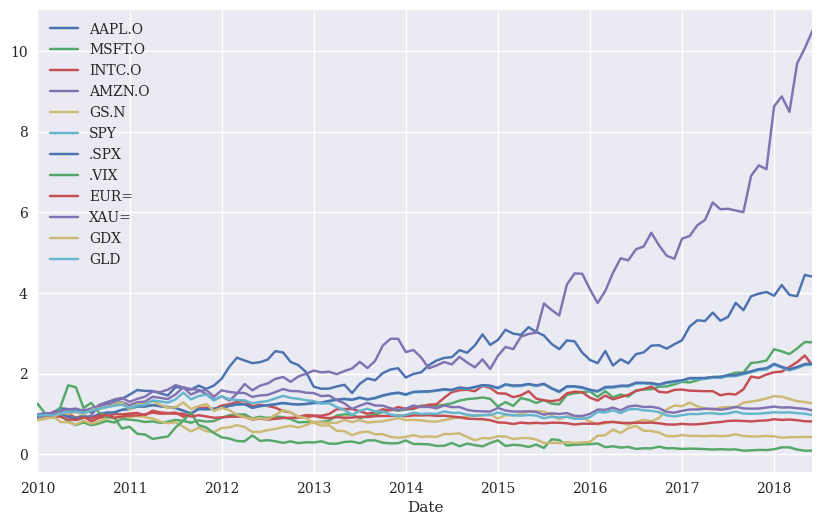

In [25]:
#累積対数収益率のプロット:まずcumsum()メソッド、次にnp.exp()呼び出しで結果を出し、最後にリサンプリング。
#図8-4 経時累積対数収益率リサンプリング（月次）
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6));

### 8.2ローリング統計

##### ファイナンスでは伝統的にローリング統計（ファイナンス指標、フィナンシャルスタディとまで呼ぶこともある）を扱います。 ローリング統計は例 えば罫線分析者やテクニカルトレーダーの基本ツールです。 本節では、1つの金融時系列しか扱いません。

##### ローリング統計については以下のURLを参照
https://ken2blog.tokyo/study/%E3%80%90python%E3%80%91%E9%87%91%E8%9E%8D%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AB%E5%BF%85%E8%A6%81%E3%81%AA%E5%9F%BA%E6%9C%AC%E3%83%86%E3%82%AF%E3%83%8B%E3%83%83%E3%82%AF/

https://vector-ium.com/pandas-rolling/


##### ロールフォワードとロールバックについては以下のURLを参照
https://wa3.i-3-i.info/diff350db.html

In [26]:
sym ='AAPL.O' 
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


#### 8.2.1概観

##### pandasで標準ロー リング統計を取 るのは簡単です。

In [27]:
#ウィンドウ定義。すなわち、対象のインデックス値の個数。
window = 20

In [28]:
#ローリ ング最小値の計算(1行目)
#ローリ ング平均値の計算(2行目)
#ローリ ング標準偏差の計算(3行目)
#ローリ ング中央値の計算(4行目)
#ローリ ング最大値の計算(5行目)
#崩壊半減期0.5指数加重移動平均の計算(6行目)
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, 
                             min_periods=window).mean()

##### より専門的なファイナンス指標を得るには、一般に追加パッケージが必要です（例えば「7.3インタラクティブ2Dプロット」で述べたCufflinksによるファイナンス用プロットを参照してください）。カスタム指標もapply()メソッドを通じで簡単に使えます。

##### 次のコードは計算したローリ ング統計の結果の一部とその可視化( 8-5)を示します。

In [29]:
data.dropna().head() 

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


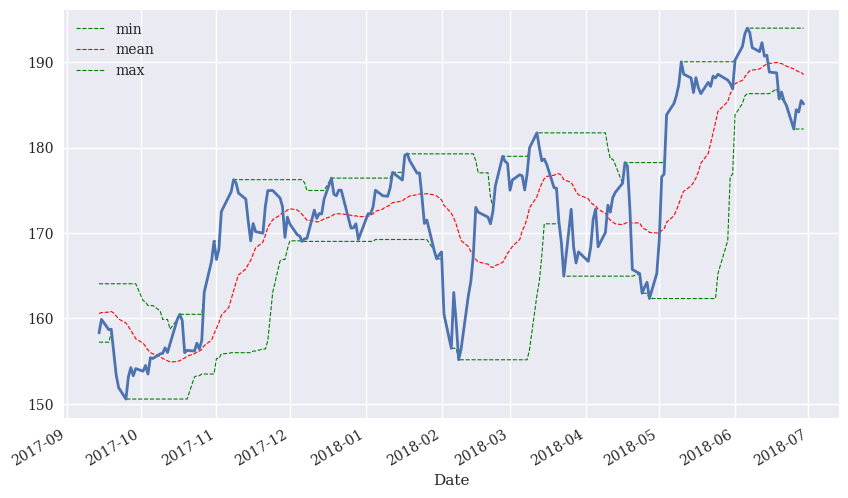

In [30]:
#末尾200行の3つのローリング統計量をプロット(2行目)
#元の時系列データをプロットに追加(3行目)
#図8-5 最小／平均／最大値のローリング統計
ax= data[['min','mean','max']].iloc[-200:].plot( 
figsize=(10, 6), style=['g--','r--','g--'], lw=0.8) 
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

#### 8.2.2テクニカル分析の例

##### ローリング統計は、例えば対象企業の戦略ポジションや財務報告書を扱うファンダメンタル分析と比較される、いわゆる株価テクニカル分析の主要ツールです。
##### テクニカル分析に基づく、数十年来の取引戦略は2つの単純移動平均(SMA)を使います。株式（または一般に金融商品）の短期SMAが長期SMAを上回るならロング、逆ならショートのポジションを取るものです。これはpandasとDataFrameオブジェクトの機能で実現できます。

##### ローリング統計は一般に、指定されたウィンドウ引数で十分なデータがある場合にだけ計算できます。図8-6に示す通り、SMA時系列は指定引数で十分なデータのある日からしか始められません。

In [31]:
#短期SMAの値計算(1行目)
#長期SMAの値計算(2行目)
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

In [32]:
data[[sym, 'SMA1','SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


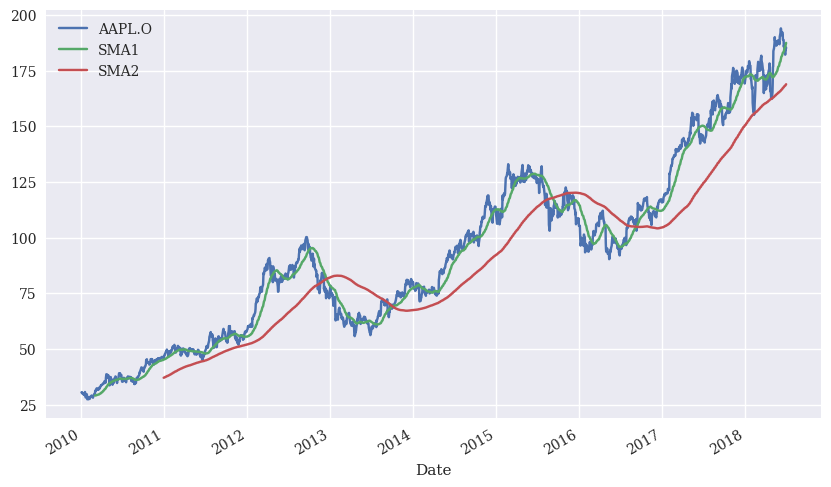

In [33]:
#株価データと2つのSMA時系列の可視化
#図8-6 Apple株価と2つの単純移動平均
data[[sym, 'SMA1','SMA2']].plot(figsize=(10, 6));

##### ここではSMAは手段にすぎません。取引戦略を実装するポジションを得るために使われます。1でロング、-1でショートのポジションを可視化したものが図 8-7です。ポジション変更は、SMA時系列を表す2つの線の(視覚的)交差を契機に実行されます。

In [34]:
#完全なdata行だけを保持
data.dropna(inplace=True)

In [35]:
#短期SMA値が長期より大きいと(1行目)
#株式はロング(1を設定)(2行目)
#そうでないと株式はショート(-1を設定)(3行目)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],
                             1,
                             -1)

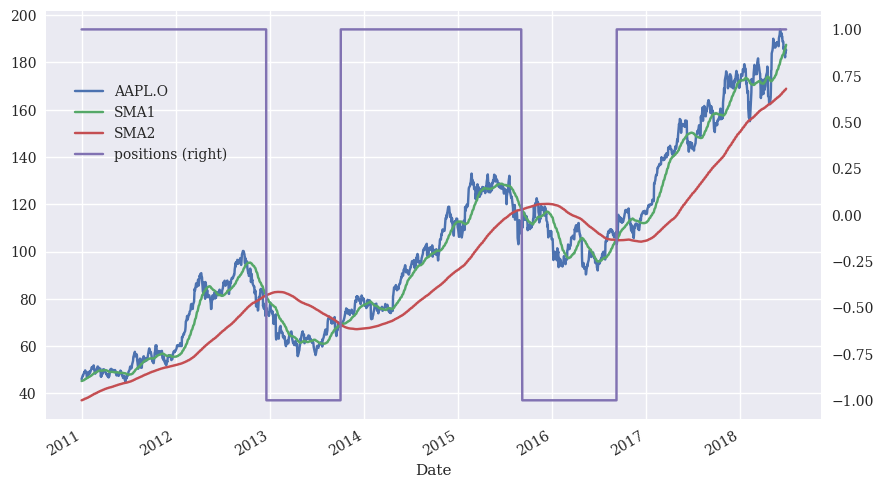

In [36]:
#図8-7 Apple株価、2つの単純移動平均、ポジション
ax= data[[sym,'SMA1','SMA2','positions']].plot(figsize=(10, 6), 
secondary_y='positions') 
ax.get_legend().set_bbox_to_anchor((0.25, 0.85)); 

##### この取引戦略では取引回数そのものはわずかです。ポジション値が変更した(すなわち交差が起こった)ときにしか取引は生じません。オープン／クローズを入れて全部で6取引です。

##### テクニカル分析については以下のURLを参照
https://www.jibunbank.co.jp/products/foreign_deposit/chart/help/

### 8.3相関分析

##### pandasによる金融時系列データ処理の例として、S&P500株価指数とVIXボラティリティ指数を取り上げます。一般にS&P500が上がるとVIXが下がり、逆も生じるという定型化された事実を扱います。これは相関であり因果関係ではありません。本節では、S&P500とVIXが(強い)負の相関だという定型化された事実の統計的証拠がどのように得られるかを示します。

##### S&P500株価指数については以下のURLを参照
https://info.monex.co.jp/fund/guide/sp500-beginner.html

##### VIXボラティリティ指数については以下のURLを参照
https://www.spglobal.com/spdji/jp/vix-intro/

#### 8.3.1データ

##### データセットはともに図8-8で可視化した2つの金融時系列データです。

In [37]:
#EODデータ(元はThomson Reuters EikonデータAPIによる)をcsvファイルから読み込む
raw= pd.read_csv('C:\\Users\\iikkdn\\Desktop\\code\\python-for-finance\\tr_eikon_eod_data.csv', 
                 index_col=0, parse_dates=True)

In [38]:
data= raw[['.SPX','.VIX']].dropna()

In [39]:
data.tail() 

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


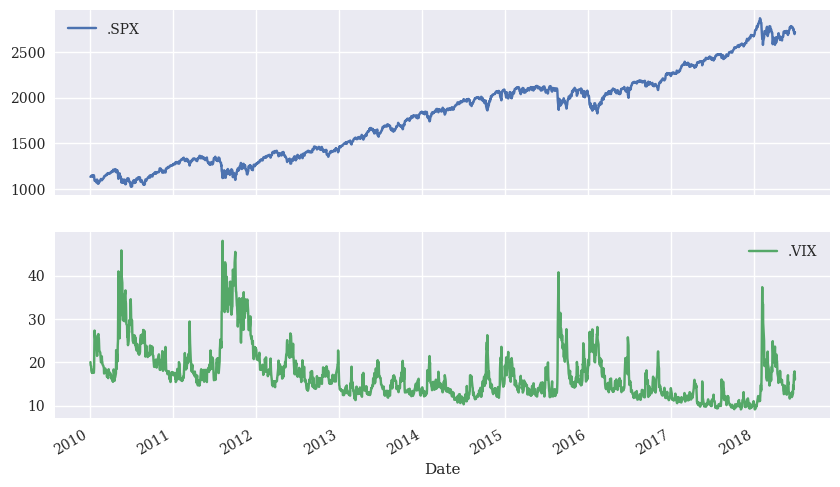

In [40]:
#図8-8 S&P500とVIX時系列データ(別のサブプロット)
data.plot(subplots=True, figsize=(10, 6));

##### 2つの時系列プロットのスケールを調整して1つのプロットにすると、2つの指数の負相関、簡単な目視でも明らかになります(図8-9)。

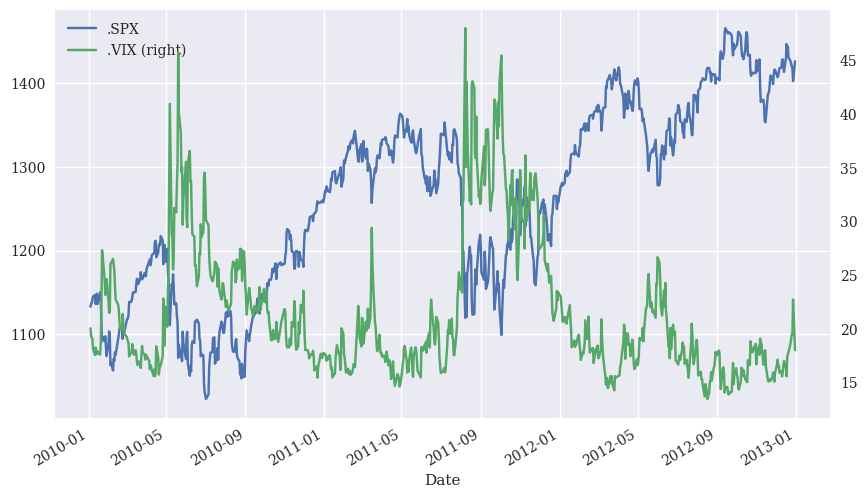

In [41]:
#.loc[:DATE]で指定DATE値までデータ選択
#図8-9 S&P500とVIX時系列データ(同じプロット)
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

### 8.3.2対数収益率

##### 既に述べたように、統計解析は一般に絶対変化や絶対値ではなくリターンを使います。 したがって、他の分析の前にまず対数収益率を計算します。高いボラティリティの対数収益率を図8-10に示します。いずれの指数においても、「ボラティリティクラスタ」が見られます。一般に株価指数の高いボラティリティ期間には、ボラティリティ指数で同じ現象になります。

In [42]:
rets = np.log(data / data.shift(1))

In [43]:
rets.head() 

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [44]:
rets. dropna(inplace= True)

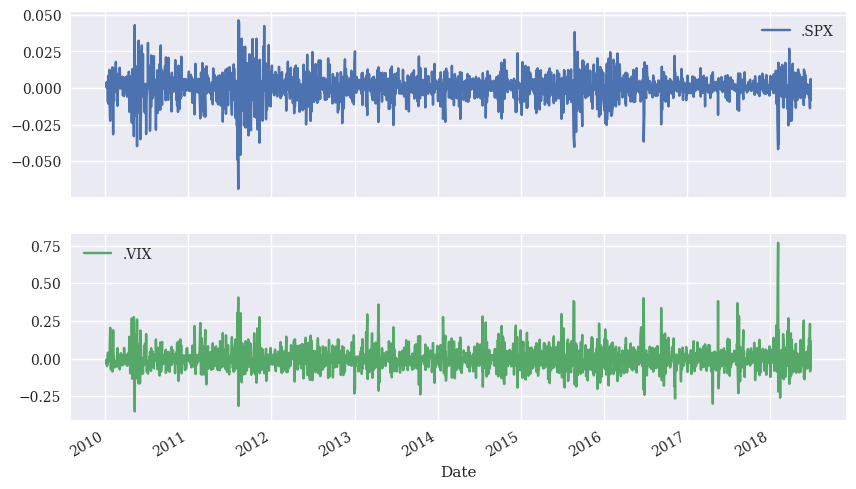

In [45]:
#図8-10 S&P500とVIXの経時対数収益率
rets.plot(subplots=True, figsize=(10, 6));

##### このような場合、pandasのscatter_matrix()プロット関数が可視化に役立ちます。2つの時系列の対数収益率を同時にプロットし、ヒストグラムかカーネル密度推定 (KDE)を対角的に(図 8-11)表示します。

##### カーネル密度推定(KDE)については以下のURLを参照
https://qiita.com/shokishimada/items/f630a20099e8e4bdc2f7


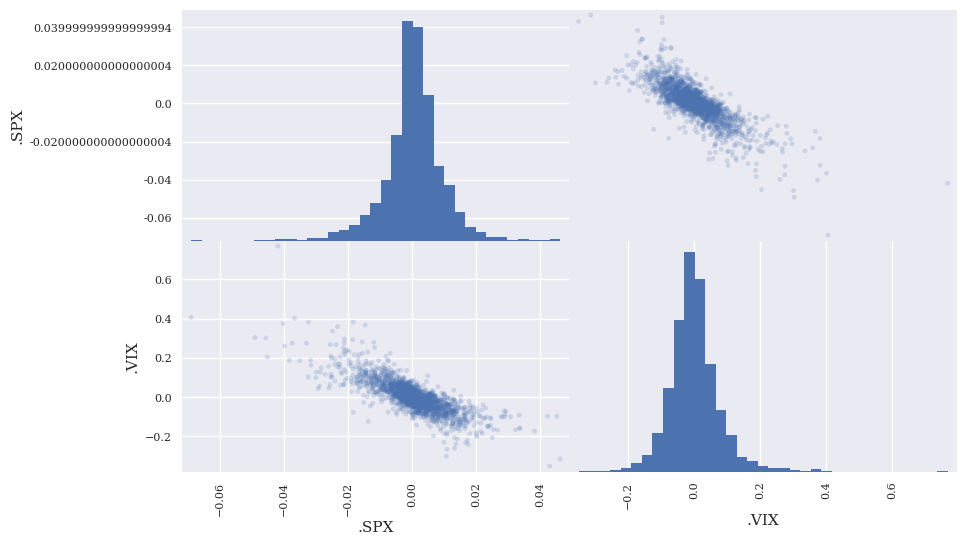

In [46]:
#プロットするテータセット(1行目)
#alpha引数に不透明度をドットで指定(2行目)
#対角上に置くもの。列テータのヒストグラム(3行目)
#ヒストグラムプロット関数に渡すキーワード引数(4行目)
#図8-11 S&P500とVIX対数収益率の散布図マトリックス
pd.plotting.scatter_matrix(rets,
                           alpha=0.2, 
                           diagonal='hist', 
                           hist_kwds={'bins': 35},
                           figsize=(10, 6)); 

### 8.3.3OLS回帰

##### 準備ができたので、最小二乗法(OLS)による回帰分析を実装します。対数収益率の散布図と点群上の線形回帰直線を図 8-12に示します。傾きは明らかに負で、2つの指数の負相関という定型化された事実を裏付けます。

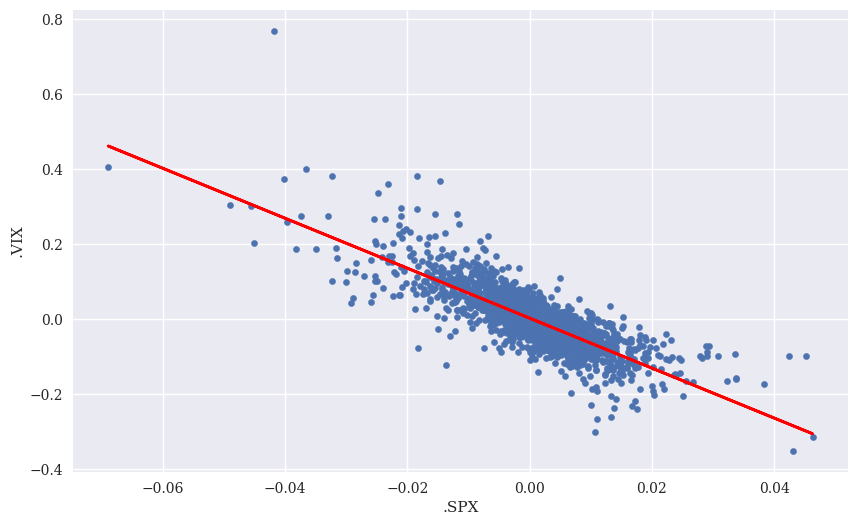

In [47]:
#線形最小二乗法の実装(1行目)
#散布図対数収益率プロット(2行目)
#線形回帰直線を追加(3行目)
#図8-12　S&P500とVIX散布図マトリックスの対数収益率
reg= np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
ax= rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'],np.polyval(reg,rets['.SPX']),'r',lw=2);

### 8.3.4相関

##### 最後に、相関尺度を取り上げます。そのような尺度を2つ、すべてのデータの静的尺度と一定期間の相関を示すローリング尺度を扱います。相関が実際に時間変動するものの、指定された引数値では常に負であることを図8-13に示します。これは S&P500とVIX指数が(強い)負の相関だという定型化された事実を強く支持します。

In [48]:
#DataFrameそのものの相関行列
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


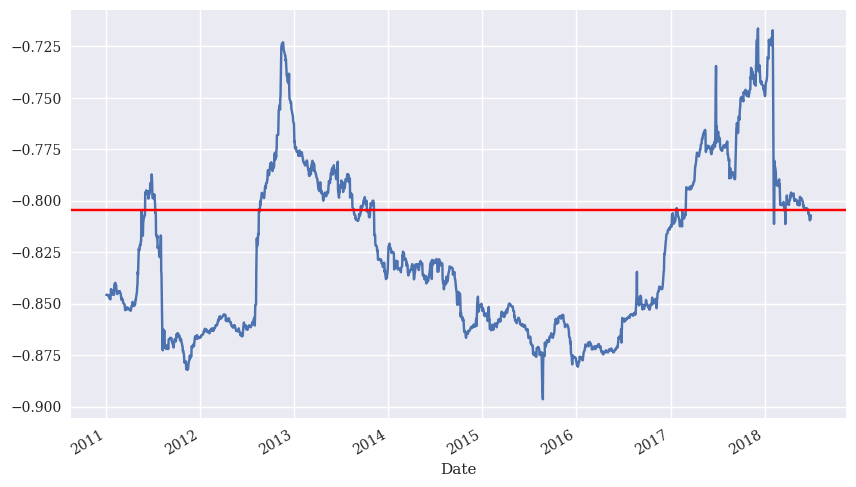

In [49]:
#ローリング相関を時間軸上にプロット(1,2行目)
#プロットに水平線で静的値を追加(3行目)
#図8-13 S&P500とVIXの静的/ローリング相関
ax= rets['.SPX'].rolling(window=252).corr( 
    rets ['.VIX']). plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r'); 

### 8.4高頻度データ

##### 本章は pandasによる金融／財務時系列分析を扱いました。ティックデータセットは、金融／財務時系列の特別な例です。実のところ、これらは、例えば本章で使ったEODデータセットと同じように扱えます。そのようなデータセットのインポートも一般にpandasで迅速に行えます。使ったデータセットは17,352行(図 8-14を参照)です。

In [50]:
%%time 
# data from FXCM Forex Capital Markets Ltd. FXCM Forex Capital Markets Ltd.によるデータ
tick=pd.read_csv('C:\\Users\\iikkdn\\Desktop\\code\\python-for-finance\\fxcm_eur_usd_tick_data.csv', 
                 index_col=0, parse_dates=True) 
CPU times:user 1.07 s,sys: 149 ms,total: 1.22 s 
Wall time:1.16 s

SyntaxError: invalid syntax (<unknown>, line 4)

In [51]:
tick.info() 
<class 'pandas.core.frame.DataFrame'> 
Datetimeindex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 
20:59:00.607000 
Data columns (total 2 columns): 
Bid 461357 non-null float64 
Ask 461357 non-null float64 
dtypes: float64(2) 
memory usage: 10.6 MB

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (4026116013.py, line 3)

In [52]:
#すべての行の仲値計算
tick['Mid']= tick.mean(axis=1)

NameError: name 'tick' is not defined

In [53]:
#図8-14 EUR/USO為替レートのティックデータ
tick['Mid'].plot(figsize=(10, 6));

NameError: name 'tick' is not defined

##### ティックデータ処理では一般に金融時系列データのリサンプリングが必要になります。次のコードはティックデータをリサンプリングした5分足の4本値データ（図8-15を参照）で、これは例えばアルゴリズム取引戦略のバックテストやテクニカル分析の実装に使えます。

In [54]:
tick_resam = tick.resample(rule='5min', label='right').last() 

NameError: name 'tick' is not defined

In [55]:
tick_resam.head() 

NameError: name 'tick_resam' is not defined

In [56]:
#図8-15 EUR/USD為替レートの5分足の4本値データ
tick_resam['Mid'].plot(figsize=(10,6));

NameError: name 'tick_resam' is not defined

### 8.5結論

##### 本章はファイナンスでおそらく最も重要なデータ型、ファイナンスの時系列を扱いました。pandasはそのようなデータセットを扱う強力なパッケージで、効率的なデータ分析だけでなく可視化もできます。pandasは、さまざまなソースからのデータセットの読み込みや、さまざまなファイルフォーマットへのエクスポートにも使えます。詳しくは 9章で説明します。

### 8.6さらに学ぶために

##### 本章の内容に関する優れた参考書は次の通りです。
##### • McKinney, Wes (2018). Python for Data Analysis. O'Reilly（邦題『Pythonによるデータ分析入門第2版』瀬戸山雅人、小林儀匡、滝口開資訳、オライリー・ジャパン）
##### • VanderPlas,Jake(2016). Python Data Science Handbook. O'Reilly（邦題『データサイエンスハンドブック』菊池彰訳、オライリー・ジャパン）
